<img src="img/full-colour-logo-UoB.png" alt="Drawing" style="width: 200px;"/>

# Introduction to Programming for Engineers

## Python 3




# 05 Algebra with Sympy, Scipy and Numpy 
## CLASS MATERIAL

<br> <a href='#FindingRootsPolynomials'>1. Finding Roots of Polynomials</a>
<br> <a href='#RootFindingInitialEstimate'>2. Root Finding using an Initial Estimate</a> 
<br> <a href='#SystemsCoupledEquations'>3. Systems of Coupled Equations</a> 
<br> <a href='#ComputationArraysBroadcasting'>4. Computation on Arrays : Broadcasting</a> 
<br> <a href='#SymbolicMathematics'>5. Symbolic Mathematics</a> 
<br><a href='#ReviewExercises'>6. Review Exercises</a>



### Lesson Goal

In this class we will learn some useful techniques for making common algebraic operations faster and easier by solving them computationally. 

This can help you to:
1. Quickly solve time-consuming mathematical problems 
1. Solve "messy" problems (e.g. experimental data)
1. Check your answers to problems solved using hand calculations

### Fundamental programming concepts
 - Python `sympy`, `numpy` and `scipy` libraries
 - Manipulating arrays to use within functions


In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='FindingRootsPolynomials'></a>

## 1. Finding Roots of Polynomials


Many applications involve finding the roots of a function.

Example:  we want to find a value or values for $x$ such that $f(x)=0$.

This is used for problems including optimization. 

__Optimization__ : Finding the maximal or minimal value of a dependent variable with respect to some independent variable(s). 

To find the maxima and minima of some function:
- take the derivative(s) of the function with respect to the independent variable(s)
- find values of the function for which the derivative(s) are equal to zero

Previously, we studied how to fit a polynimal function through a series of data points. 

For some functions, the roots are easy to find analytically:

$f(x) = 2x^3 - 8x^2 - 96x$

As each term is divisible by $2x$, we can easily factorise this function to:

$f(x)=(2x)(x + 4)(x - 8)$

The roots are 0, -4, and 8.

When working with real data, root finding is often not so straighforward. 

- noisy experimental data
- higher order polynomials 

In [2]:
# Example data using example polynomial
x = np.linspace(-6, 10, 100) # 100 equally spaced points between -6 and 10

y = (2*x**3 - 8*x**2 - 96*x) # function y = 2x^3 - 8x^2 - 96x

We can use pseudo-random number generators to make the data more "messy" i.e. more like real experimental data.

This is an example of scope. 

Notice that two random number libraries are used:

- `np.random` e.g. `np.random.random` : generates rando number in range [0.0, 1.0)
- `random` e.g `random.sample` : selects a random sample from data given

In [3]:
# add noise : multiply each y value by random number
y_n = y * np.random.random(size=x.shape) 

# Choose a random sample of 50 data points
x_e, y_e = zip(*random.sample(list(zip(x, y_n)), 50))

# sort into x-ascending order 
tmp = sorted(zip(x_e, y_e))

# split into x and y
x_e = [t[0] for t in tmp]
y_e = [t[1] for t in tmp]

In [4]:
# Fit a polynomial of order 3 to the data
coeffs = np.polyfit(x_e, y_e, 3)

yfit = np.poly1d(coeffs)(x_e)

# Round all coefficients to 3d.p.
coeffs = [round(c,3) for c in coeffs]

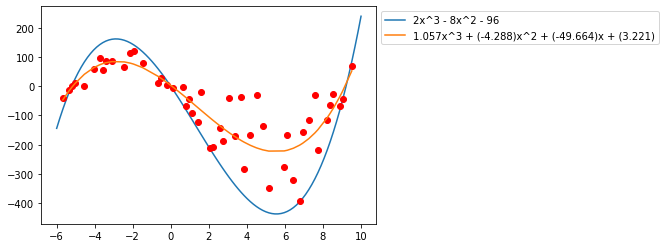

In [5]:
# Plot the data
plt.plot(x, y,  label=f'2x^3 - 8x^2 - 96')      # orignal data
plt.plot(x_e, y_e, 'ro')                        # "experimental" data

plt.plot(x_e, yfit, label=f'{coeffs[0]}x^3 + ({coeffs[1]})x^2 + ({coeffs[2]})x + ({coeffs[3]})')      # fitted data

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

We can see that the fitted polynomial does not factorise so cleanly. 

This makes it difficult to solve the equation *analytically*. 

- __Analytical solution__ : An exact solution can be found.
- __Numerical solution__ :  The solution is iteratively guessed until the answer is good enough enough to stop.

We can solve the problem numerically, for example using the bisection method. 
<img src="img/bisection_method.png" alt="Drawing" style="width: 300px;"/>
__Biscetion method__:
For a given function F(x):
1. two values a and b are chosen for which F(a) > 0 and F(b) < 0 (or the other way around)
1. interval halving: a midpoint x=c is calculated as the arithmetic mean between a and b, c = (a + b) / 2
1. F(c) is evaluated at c
1. if F(c) = 0 the root of the function is c
1. if F(c) ≠ 0, check the sign of F(c):
    - if F(c) has the same sign as F(a), replace a with c (b stays the same)
    - if F(c) has the same sign as F(b), replace b with c (a stays the same)
1. go back to step 2.

The algorithm ends when the values of F(c) is less than a defined tolerance (e.g. 0.001). 

When we import a Python function, a computer algorithm runs this or a similar numerical solver. 

We can use the functions `roots` to find the roots of a polynomial function.

Appreciably, this is much faster than finding the roots numericlaly by hand or by writing the algorithm ourselves. 

In [6]:
r = np.roots(coeffs)
print(r)


[ 9.15349497 -5.16123286  0.06450232]


We can plot the polynomial equation and the roots to check the solution:

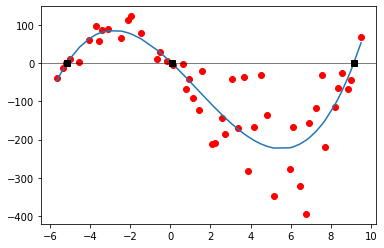

In [7]:
plt.plot(x_e, y_e, 'ro')                        # "experimental" data
plt.plot(x_e, yfit)                   # fitted data
plt.axhline(0, color='black', lw=0.5) # y=0 axis

z = np.zeros(len(r))                  # array of zeros  
plt.plot(r, z, 'ks')                  # roots

For a polynomial function, we know that there will be as many roots as the order of the function.
<br>e.g. the cubic function above will have three roots.

It is easy to verify this:
1. visually from the plot above.
1. in code:

In [8]:
print(f'number of roots = {len(r)}')

number of roots = 3


Another example showing the full process:

[ 2.85577251 -2.17740968  0.32163717  0.        ]


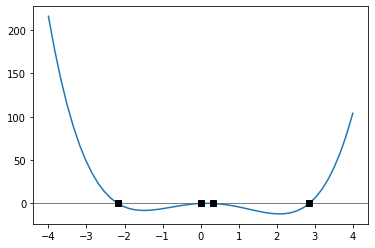

In [9]:
X = np.linspace(-4, 4)       # x data
coeffs = [1, -1, -6, 2, 0]   # coefficients of polynomial
Y = np.poly1d(coeffs)(X)     # y data
R = np.roots(coeffs)         # roots
print (R)

# plot
plt.axhline(0, color='black', lw=0.5) 
plt.plot(X, Y)               # x,y data   
Z = np.zeros(len(R)) 
plt.plot(R, Z, 'ks')         # roots

<a id='RootFindingInitialEstimate'></a>
# 2. Root Finding using an Initial Estimate



`roots` ony works for polynomials.

There are other python functions available for finding the roots of other functions.

For a polynomial function, we know that there will be as many roots as the order of the function.

For other functions, the number of roots may be:

- initially unknown
- infinite
<img src="img/cos_graph.png" alt="Drawing" style="width: 300px;"/> 

The function `fsolve` finds the roots of a function, given a starting estimate.

In [10]:
from scipy.optimize import fsolve

In [11]:
# the function must be a python function
def f(t):
    return t**2 - 4

starting_guess = 3

print(fsolve(f, starting_guess))

[2.]


We can plot the data to check that there is a root at 2.

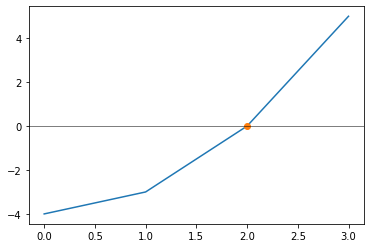

In [12]:
plt.plot(range(4), [f(r) for r in (range(4))])

plt.plot(2, f(2), 'o')

plt.axhline(0, color='black', lw=0.5)

A `lambda` function can be used to make the code shorter as we do not need to create a function definition with `def`.

In [13]:
starting_guess = 3

print(fsolve(lambda t: t**2 - 4, starting_guess))

[2.]


Let's plot the experimental data from earlier. 

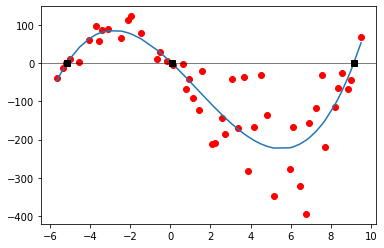

In [14]:
plt.plot( x_e, y_e, 'ro')  # "experimental" data
plt.plot( x_e, yfit )      # fitted data
plt.plot( r, np.zeros(len(r)), 'ks')
plt.axhline(0, color='black', lw=0.5) 

We can see that there are roots close to -6, 0 and 10

In [15]:
# Fit a polynomial of order 3 to the data
coeffs = np.polyfit(x_e, y_e, 3)

In [16]:
print(fsolve(lambda t: np.poly1d(coeffs)(t), -6))
print(fsolve(lambda t: np.poly1d(coeffs)(t), 0))
print(fsolve(lambda t: np.poly1d(coeffs)(t), 10))

[-5.16171255]
[0.06451022]
[9.15520854]


These are the same as the roots we found earlier.

It is possible to automate this search by setting a tolerance for the proximity of a value to 0 at which the computer should check for a root. 

As this depends on the resolution of your y data, it is advisable to plot the data in order to check your solution.



In [17]:
def all_roots(tolerance):
    """
    Uses fsolve to find a root close a y value if the y value is within a given tolerance of the x axis
    """
    print(f'tolerance = {tolerance}')
    for guess in np.poly1d(coeffs)(x_e):    # for each y data point
        if abs(guess) < tolerance:          # if y is close to 0 within tolerance 
            print(fsolve(lambda t: np.poly1d(coeffs)(t), guess))   # print a root
    print()
    

all_roots(0.1)
all_roots(1)
all_roots(10)
all_roots(11)
all_roots(20)

tolerance = 0.1

tolerance = 1

tolerance = 10
[0.06451022]
[-5.16171255]

tolerance = 11
[0.06451022]
[9.15520854]
[-5.16171255]

tolerance = 20
[-5.16171255]
[0.06451022]
[9.15520854]
[9.15520854]
[-5.16171255]
[-5.16171255]



<a id='SystemsCoupledEquations'></a>
# 3. Systems of Coupled Equations

<br> <a href='#SystemsLinearEquations'>3.1 Systems of Linear Equations</a>
<br> <a href='#SystemsNonLinearEquations'>3.2. Systems of Non-Linear Equations</a> 






<a id='SystemsLinearEquations'></a>
### 3.1 Systems of Linear Equations


A system of linear equations (or linear system) is a collection of two or more linear equations involving the same set of variables. 

__Example :__ Given the equations below, find $x_1$, $x_2$ and $x_3$.

\begin{align*}
x_1 - x_2 + x_3 &= 0\\
10x_2 + 25x_3 &= 90\\
20x_1 + 10x_2 &= 80\\
\end{align*}



We have three equations and three unknown values so we can solve the equations by hand, for example using substitution or elimitaion.

As the number of variables or the number of equations increases, the calculation time and difficulty in finding the solution may also increase. 



We can use the function `solve` from the Numpy linear algebra module.

`solve` solves equations of the form `ax = b` for x

To put the system of equations into this form, we must represent the system using matrices, and in code, `numpy array`s. 

First, arrange the values from the right-hand-side and the coefficients from the left-hand-side as Numpy arrays.



In [18]:
A = np.array([[1, -1, 1],
              [0, 10, 25],
              [20, 10, 0]])

B = np.array([0, 90, 80])

If you are familiar with matrices, this is equivalent to expressing the form: 

\begin{equation*}
\underbrace{
\begin{bmatrix}
1 & -1 & 1  \\
0 & 10 & 25 \\
20 & 10 & 0 \\
\end{bmatrix}
}_{\mathbf{A}}
\cdot
\underbrace{
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
}_{\mathbf{x}}
=\underbrace{
\begin{bmatrix}
0 \\
90 \\
80 \\
\end{bmatrix}
}_{\mathbf{B}}
\end{equation*}

Notice that B appears in code as a horizontal array.

In Python, 1D arrays are ALWAYS represented horizontally. 

The array is treated as a row or column vector depending on the equation in which it appears.

Solve for x:

In [19]:
x = np.linalg.solve(A, B)
print(x)


[2. 4. 2.]


$x_1 = 2$
<br>$x_2 = 4$
<br>$x_3 = 2$



To verify that this is correct, we can find the matrix product or dot product of $\mathbf{A}$ and $\mathbf{x}$. 

In [20]:
print(np.dot(A,x))
print(np.matmul(A,x))

[ 0. 90. 80.]
[ 0. 90. 80.]


The solution matches the original equation, which we can confim in code:

In [21]:
print(np.dot(A,x) == B)

[ True  True  True]


### Example Engineering Application: Statically Determinate Truss
A common problem in statics is the analysis of a statically determinate planar truss. 

Trusses are characterized by linear members (beams) which are pinned together at their ends. 
<br>The pinned connections provide no resistance to rotation so there are no moments around the joints. 
<br>A planer truss is a truss arranged in a single plane; we consider forces in 2 dimensions only. 


<img src="img/truss.gif" alt="Drawing" style="width: 600px;"/> 

### Example Engineering Application: Statically Determinate Truss

A truss is said to be statically determinate if all:
- support reactions
- forces in each member

can be calculated using only the *equations of static equalibrium*. 


<img src="img/truss.png" alt="Drawing" style="width: 300px;"/> 

#### Static Equilibrium
There is one force in each member. 

The forces acting on each joint sum to zero. 

The forces are resolved in the vertical and horizontal directions. 

Therefore there are (number of joints x 2) equations of static equalibrium for a given truss. 

<img src="img/truss_nodes.png" alt="Drawing" style="width: 300px;"/> 


A truss is statically determinate if:
> number of members + number of support reactions <= number of joints x 2

in other words:
> number of unknowns values <= number of equations

Consider a truss with:
- 5 members
- 4 joints
- 3 support reactions
- 1 external force 

A truss is statically determinate if:
<br>members + support reactions <= joints x 2
<br>5 + 3 = 8

The truss is statically determinate.

__Assumption__ : Members 1, 2, 4, 5 are of equal length. 

<img src="img/truss.png" alt="Drawing" style="width: 300px;"/> 

 

__Question : Find the support reaction forces R1-R3 and the forces in each member F1-F5__

<img src="img/truss.png" alt="Drawing" style="width: 300px;"/> 

#### Static Equilibrium

The sum of the forces at each node must equal zero.

There are two equations for each point, the horizontal equation and the vertical equation. 

<img src="img/truss_nodes.png" alt="Drawing" style="width: 300px;"/> 

<img src="img/truss_nodes.png" alt="Drawing" style="width: 200px;"/> 

Let's find the horizontal (H) and vertical (V) equilibrium equation for each node:

<br>1H : $ -F_1 - E = 0$

<br>1V : $ -F_5 = 0$

<br>2H : $ F_1 + cos \frac{\pi}{4}F_3 = 0$

<br>2V : $ -F_2 - sin \frac{\pi}{4}F_3 = 0$

<br>3H : $ F_4 = 0$

<br>3V : $ F_2 + R_1 = 0$

<br>4H : $ -cos \frac{\pi}{4}F_3 - F_4 + R_3 = 0$

<br>4V : $ sin \frac{\pi}{4}F_3 + F_5 + R_2 = 0$


The equations above can be rewritten in matrix notation.  <br>Notice  external force, $E$ is moved to the right hand side of the equation so it's sign is changed. 


\begin{equation*}
\underbrace{
\begin{bmatrix}
-1  & 0   & 0    & 0   & 0    & 0   & 0  & 0  \\
0   & 0   & 0    & 0   & -1   & 0   & 0  & 0  \\
 1  & 0   & cos \frac{\pi}{4} & 0  & 0    & 0   & 0  & 0  \\
0   & -1  & -sin \frac{\pi}{4}& 0  & 0    & 0   & 0  & 0  \\
0   & 0   & 0    & 1   & 0    & 0   & 0  & 0  \\
0   & 1   & 0    & 0   & 0    & 1   & 0  & 0  \\
0   & 0   & -cos \frac{\pi}{4}& 0  & 0    & 0   & 0  & 0  \\
-1  & 0   & sin \frac{\pi}{4} & 0  & 1    & 0   & 1  & 0  \\
\end{bmatrix}
}_{\mathbf{coeffs}}
\cdot
\underbrace{
\begin{bmatrix}
F_1 \\
F_2 \\
F_3 \\
F_4 \\
F_5 \\
R_1 \\
R_2 \\
R_3 \\
\end{bmatrix}
}_{\mathbf{u}}
=\underbrace{
\begin{bmatrix}
1000 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
}_{\mathbf{k}}
\end{equation*}

The equations above can be rewritten in matrix notation.  <br>Notice  external force, $E$ is moved to the right hand side of the equation so it's sign is changed. 


\begin{equation*}
\underbrace{
\begin{bmatrix}
-1  & 0   & 0    & 0   & 0    & 0   & 0  & 0  \\
0   & 0   & 0    & 0   & -1   & 0   & 0  & 0  \\
 1  & 0   & \frac{\sqrt{2}}{2}      & 0  & 0    & 0   & 0  & 0  \\
0   & -1  & -\frac{\sqrt{2}}{2}     & 0  & 0    & 0   & 0  & 0  \\
0   & 0   & 0    & 1   & 0    & 0   & 0  & 0  \\
0   & 1   & 0    & 0   & 0    & 1   & 0  & 0  \\
0   & 0   & -\frac{\sqrt{2}}{2}     & 0  & 0    & 0   & 0  & 0  \\
-1  & 0   & \frac{\sqrt{2}}{2}      & 0  & 1    & 0   & 1  & 0  \\
\end{bmatrix}
}_{\mathbf{coeffs}}
\cdot
\underbrace{
\begin{bmatrix}
F_1 \\
F_2 \\
F_3 \\
F_4 \\
F_5 \\
R_1 \\
R_2 \\
R_3 \\
\end{bmatrix}
}_{\mathbf{u}}
=\underbrace{
\begin{bmatrix}
1000 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
}_{\mathbf{k}}
\end{equation*}

In [22]:
print(np.sin(np.pi/4))
print(np.cos(np.pi/4))

print(2**(1/2)/2)

0.7071067811865475
0.7071067811865476
0.7071067811865476


In [23]:
# Arrays for the known values
coeffs = np.array([[-1,  0,   0,                  0,   0,  0,   0,   0 ],
                   [ 0,  0,   0,                  0,  -1,  0,   0,   0 ],
                   [ 1,  0,   np.cos(np.pi/4),    0,   0,  0,   0,   0 ], 
                   [ 0, -1,   -np.sin(np.pi/4),    0,   0,  0,   0,   0 ],
                   [ 0,  0,   0,                  1,   0,  0,   0,   0 ],    
                   [ 0,  1,   0,                  0,   0,  1,   0,   0 ],     
                   [ 0,  0,   -np.cos(np.pi/4),    -1,   0,  0,   0,   1 ],
                   [ 0,  0,   np.sin(np.pi/4),     0,   1,  0,   1,   0 ]])

k = np.array([1000, 0, 0, 0, 0, 0, 0, 0])


# Solve for u
u = np.linalg.solve(coeffs, k)
print(u)

[-1000.         -1000.          1414.21356237     0.
    -0.          1000.         -1000.          1000.        ]


In [24]:
# Arrays for the known values

coeffs = np.array([[-1,  0,   0,             0,   0,  0,   0,   0 ],
                   [ 0,  0,   0,             0,  -1,  0,   0,   0 ],
                   [ 1,  0,   2**(1/2)/2,    0,   0,  0,   0,   0 ], 
                   [ 0, -1,  -(2**(1/2)/2),  0,   0,  0,   0,   0 ],
                   [ 0,  0,   0,             1,   0,  0,   0,   0 ],    
                   [ 0,  1,   0,             0,   0,  1,   0,   0 ],     
                   [ 0,  0,  -(2**(1/2)/2), -1,   0,  0,   0,   1 ],
                   [ 0,  0,  2**(1/2)/2,     0,   1,  0,   1,   0 ]])

k = np.array([1000, 0, 0, 0, 0, 0, 0, 0])

u = np.linalg.solve(coeffs, k)
print(u)

[-1000.         -1000.          1414.21356237     0.
    -0.          1000.         -1000.          1000.        ]


Check your solution.
<br>The `@` symbol can be used as shorthand for `np.dot` to find the dot product. 

In [25]:
print(coeffs @ u)

print(np.around(coeffs @ u, 2))


[ 1.00000000e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.54631438e-14]
[1000.    0.    0.    0.    0.    0.    0.   -0.]


##### Alternative Solution
We can find $\mathbf{u}$ by matrix multiplication:
\begin{align*}
\mathbf{coeffs}\cdot\mathbf{u}&=\mathbf{k}\\
\end{align*}

but we have to rearrange the equation.

\begin{align*}
\mathbf{u}  &=\frac{\mathbf{k}}{\mathbf{coeffs}}\\
            &=\mathbf{coeffs^{-1}}\cdot\mathbf{k}\\
\end{align*}



The Numpy linear algebra module can be used to find the inverse of matrix $\mathbf{k}$.

In [26]:
coeffs_i = np.linalg.inv(coeffs)

u = np.dot(coeffs_i, k)

print(u)


[-1000.         -1000.          1414.21356237     0.
     0.          1000.         -1000.          1000.        ]


<a id='SystemsNonLinearEquations'></a>
## 3.2 Systems of Non-Linear Equations


The examples so far have been systems of linear equations.

We can also use `fsolve` to solve systems of non-linear equations.

__Example application__ : finding the coefficients of a quadratic polynomial function, using three points that lie on the curve of the function.

The equation for a parabola is $y=ax^2+bx+c$

The equation of a parabola can be fully defined using three points that lie on the curve (provided the curve is not a  straight line). 

Given three points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$,
<br>three simultaneous equation may be written: 

$$
\begin{split}
ax_1^2+bx_1+c&=y_1 \\
ax_2^2+bx_2+c&=y_2 \\
ax_3^2+bx_3+c&=y_3 \\
\end{split}
$$



__Example__

Given that:
<br>$(x_1,y_1)=(-2,2)$ 
<br>$(x_2,y_2)=(1,-1)$ 
<br>$(x_3,y_3)=(4,4)$

find $a$,$b$ and $c$.

\begin{equation*}
\underbrace{
\begin{bmatrix}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
\end{bmatrix}
}_{\mathbf{x}}
\cdot
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
=\underbrace{
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\end{bmatrix}
}_{\mathbf{y}}
\end{equation*}


\begin{equation*}
\underbrace{
\begin{bmatrix}
-2^2 & -2 & 1  \\
1^2 & 1 & 1 \\
4^2 & 4 & 1 \\
\end{bmatrix}
}_{\mathbf{x}}
\cdot
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
=\underbrace{
\begin{bmatrix}
2 \\
-1 \\
4 \\
\end{bmatrix}
}_{\mathbf{y}}
\end{equation*}

In [27]:
# 1D array, y
y = np.array([2, -1, 4])

# 2D array, x
x = np.array([[(-2**2), -2, 1],
              [(1**2),   1, 1],
              [(4**2),   4, 1]])

abc = np.linalg.solve(x, y)
print(abc)

[ 0.8        -2.33333333  0.53333333]


<a id='ComputationArraysBroadcasting'></a>
# 4. Computation on Arrays: Broadcasting

<br> <a href='#Broadcasting'>4.1 Broadcasting</a>
<br> <a href='#RulesBroadcasting'>4.2 Rules of Broadcasting</a> 
<br> <a href='#ExampleUsesBroadcasting'>4.3 Example Uses of Broadcasting</a> 

Another means of vectorizing operations (making functions apply elementwise) is to use NumPy's *broadcasting* functionality.

Broadcasting is simply a set of rules for applying elementwise functions (e.g. addition, subtraction, multiplication...) on arrays of different sizes.

## Limitation with Array Arithmetic

For arrays of the *same size*, operations are performed on element-wise.

In [28]:
import numpy as np

In [29]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

<a id='Broadcasting'></a>
## 4.1 Broadcasting




Broadcasting allows these types of binary operations to be performed on arrays of different sizes.

We can think of this like applying a scaler (using addition in this case) to each element of the array. 

In [30]:
a + 5

array([5, 6, 7])

##### What does this code do?
This operation:
1. *stretches* or *duplicates* the value ``5`` into the array ``[5, 5, 5]``
2. and adds the results.

The advantage of NumPy's broadcasting is that we do not need to explicitly perform this duplication which can be especially helpful with large data sets.



##### Dimensions are compatible when the length of at least one of them is equal to 1.

<img src="img/broadcasting1x3.gif" alt="Drawing" style="width: 300px;"/>

In the dimension where `b` has size 1 and `a` has a size greater than 1 (i.e. 3), `b` behaves as if it were copied along that dimension.

This principle extends to arrays of higher dimension. 

##### Dimensions are compatible when the length of at least one of them is equal to 1.

<img src="img/broadcasting4x3.gif" alt="Drawing" style="width: 300px;"/>



Example : Add a 1D array to a 2D array:

In [31]:
a = np.array([0, 1, 2])
M = np.ones((3, 3))
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


In [32]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

More complicated cases can involve broadcasting of both arrays.

The one-dimensional array ``a`` is stretched, or __broadcast__ across the second dimension in order to match the shape of ``M``.

In [33]:
a = np.arange(3)

b = np.arange(3).reshape(3,1)
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [34]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Here we stretched *both* ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!

![Broadcasting Visual](img/02.05-broadcasting.png)

Summary figure adapted by ... from source published in the [astroML](http://astroml.org) documentation).

<a id='RulesBroadcasting'></a>
## 4.2 Rules of Broadcasting



Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- __Rule 1:__ If the two arrays differ in their *number of dimensions*, the shape of the one with fewer dimensions is *padded* copied in the missing dimension.
- __Rule 2:__ If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is *stretched* to match the other shape.
- __Rule 3:__ If in any dimension the sizes disagree *and* neither dimension is equal to 1, the arrays are incomatible (an error is raised).

<img src="img/broadcasting_mismatch.gif" alt="Drawing" style="width: 300px;"/>

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [35]:
M = np.ones((2, 3))
a = np.arange(3)
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3) # 2D`` 
- ``a.shape = (3,) # 0D``   

Rule 1 : array ``a`` has fewer dimensions --> copy in missing dimension:

- ``M.shape -> (2, 3) # 2D``
- ``a.shape -> (1, 3) # 1D``

Rule 2 : Number of columns matches --> stretch this dimension:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [36]:
M = np.ones((2, 3))
a = np.arange(3)

M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

Let's take a look at an example where *both* arrays need to be broadcast:

In [37]:
a = np.arange(3)[:, np.newaxis]  # a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 : array ``b`` has fewer dimensions --> copy in missing dimension

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

Rule 2 : Number of columns and rows mis-match. At least one is equal to 1 --> stretch this dimension:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [38]:
a = np.arange(3)[:, np.newaxis]  # a = np.arange(3).reshape((3, 1))
b = np.arange(3)

a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [39]:
M = np.ones((3, 2))
a = np.arange(3)
print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2) # 2D``
- ``a.shape = (3,)   # 0D``

Rule 1 : array ``a`` has fewer dimensions --> copy in missing dimension:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

Rule 3 : If in any dimension the sizes disagree *and* neither dimension is equal to 1 --> incompatibe. 

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [40]:
M = np.ones((3, 2))
a = np.arange(3)

M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

<a id='ExampleUsesBroadcasting'></a>
## 4.3 Example Uses of Broadcasting

### Broadcasting Example: Calorie Calculator

Let's say we have a large data set; each datum is a list of parameters.

Example datum: a type of food and the the amount of fat, protein and carbohydrate in a serving of that food.

Our data set of food nutrients might look something like the table below:

|Food (100g) |Fat(g)|Protein (g)|Carbohydrate (g)|
|------------|----- |-----------|----------------|
|Almonds     |    49|         21|              22|                         
|Peas        |     0|          5|              14|   
|Avocado     |    15|          2|               9|
|Kale        |     1|          3|              10|  

   


By applying the following sclaing factors, we can calculate the number of calories in a food type due to fat, protein and carbohydrate:
 -  fat: 9 cal/g
 -  protein: 4 cal/g
 -  carbohydrate 4 cal/g
 
Using what we have studied so far, we could convert the table to calories using a loop:


```python

nutrients = np.array([[49, 21, 22],
                      [0,   5, 14],
                      [15,  2,  9],
                      [ 1,  3, 10]])

cal_convert = np.array([9, 4, 4])

calories = np.empty((4,3))

for index, value in enumerate(nutrients):
    calories[index] = value * cal_convert
    
```
    

However, it is faster and more concise to broadcast the two arrays together: 

In [ ]:
nutrients = np.array([[49, 21, 22],
                      [0,   5, 14],
                      [15,  2,  9],
                      [ 1,  3, 10]])

cal_convert = np.array([9, 4, 4])

calories = nutrients * cal_convert

print(calories)

### Broadcasting Example: Matrix Generation

Taking the example from earlier, where we solve a system of simultaneous equations 

$$
\begin{split}
ax_1^2+bx_1+c&=y_1 \\
ax_2^2+bx_2+c&=y_2 \\
ax_3^2+bx_3+c&=y_3 \\
\end{split}
$$

we can write the equations in array or matrix form and solve for the missing values $a, b, c$


\begin{equation*}
\underbrace{
\begin{bmatrix}
-2^2 & -2 & 1  \\
1^2 & 1 & 1 \\
4^2 & 4 & 1 \\
\end{bmatrix}
}_{\mathbf{x}}
\cdot
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
=\underbrace{
\begin{bmatrix}
2 \\
-1 \\
4 \\
\end{bmatrix}
}_{\mathbf{y}}
\end{equation*}

In [ ]:
# 1D array, y
y = np.array([2, -1, 4])

# 2D array, x
x = np.array([[(-2**2), -2, 1],
              [(1**2),   1, 1],
              [(4**2),   4, 1]])

abc = np.linalg.solve(x, y)
print(abc)

Typing this out, particularly matrix x is rather tedious.

Another way to create matrix x without writing it out explicitly is to use:
- broadcasting
- the numpy function, `power()` (raises first argument to power of second)


In [ ]:
# array
xs = np.array([-2, 1, 4])
#print(xs, end='\n\n')

#vertical 3x1
xs = xs[:, np.newaxis] # xs = xs.reshape((3,1))
print(xs, end='\n\n')

# horizontal array 0x3
power = np.array([2, 1, 0])
print(power, end='\n\n')

# 3x3
x = np.power(xs, power)
print(x, end='\n\n')

### Broadcasting Example: Vector Quantisation Algorithm
This is a simple algorithm used for catagorisation.
<br>It determines which catagory a data point should belong to from its closest proximity to a set of values representing possible catagories.
<br>Each value represents the mean of the corresponding catagory.





<br>For example, colour quantisation is used in image processing reduces the number of distinct colors used in an image, while maintianing visual similarity to the original image. 

<table><tr><td> 
<img src="img/un_quantised_cat.png" alt="Drawing" style="width: 300px;"/> </td><td> 
<img src="img/quantised_cat.png" alt="Drawing" style="width: 300px;"/> </td><td> 
</table>

CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=1477223

<br>In the plot below, each of the circles represents the mean height and weight of athletes grouped by type. 
<br>The square represents the height and weight of an athlete to be classified. 
<img src="img/vector_quantisation.png" alt="Drawing" style="width: 500px;"/>


To find the closet point:
1. Use broadcasting to find the difference between the position of the __square__ and the position of each __circle__ in the x and y directions. <br>
1. Find the euclidian distance, $d$ from the square, $s$ to each circle, $c$ using: <br>$d = \sqrt{(x_{c}-x_{s})^2 + (y_{c}-y_{s})^2}$ <br>
1. Choose the group corresponding to the minimum distance, $d_{min}$

In [ ]:
athlete = np.array([111.0,188.0])

categories = np.array([[102.0, 203.0],
                       [132.0, 193.0],
                       [45.0, 155.0],
                       [57.0, 173.0]])

# 1. broadcast
diff = categories - athlete

# 2. distance to each point (magnitude of values along axis 1 for each datum)
# dist = np.linalg.norm(diff,axis=1)
dist = np.sqrt(np.sum(diff**2,axis=1))

# 3. which group?
nearest = np.argmin(dist)
print(nearest)

The nearest group is index 0 of the array `catagories`.
<br>Based on mean height and weight, the athlete is most likely to be a basketball player.

### Broadcasting Example : Plotting a two-dimensional function
One place that broadcasting is very useful is in displaying images based on two-dimensional functions.
If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [ ]:
# We can use Matplotlib `imshow` to represent 3D data
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

<a name="VectorisingFunctions"></a>

## Vectorising Functions

Numpy functions applied to a single array, will be performed on each element in the array. 

The function takes an array of values as an input argument.

In [ ]:
a = np.array([2, 3, 4])

print(np.sqrt(a))

print(a ** (1/2))

For example, we can apply trigonometric functions, elementwise, to arrays, and lists. 

In [ ]:
x = np.array([0.0, np.pi/2, np.pi, 3*np.pi/2])
y = [0.0, np.pi/2, np.pi, 3*np.pi/2]
z = (0.0, np.pi/2, np.pi, 3*np.pi/2)

print(np.sin(x))
print(np.cos(y))
print(np.tan(z))

An array of values does not work as an input for all functions.

In [ ]:
def func(x):
    if x < 0:
        f = 2 * x
    else:
        f = 3 * x
    return f

x = np.array([2, -2])

#y = func(x) # Run this line after removing the # to see the error generated

This doesn't work because Python doesn't know what to do with the line 

`if x < 0` 

when `x` contains many values. 

For some values of `x` the `if` statement may be `True`, for others it may be `False`. 



A simple way around this problem is to vectorise the function. 

We create a new function that is a *vectorized* form of the original function.

The new function and can be called with an array as an argument.  

In [ ]:
funcvec = np.vectorize(func)

print(funcvec(x))

### Vectoried functions as function arguments
<a name="VectorisedFunctionsFucntionArguments"></a>
Functions that receive vectorised arguments are automatically applied to all elements of array inputs. 

This is better exlpained with an example.



Recall the function `is_positive`: 

In [ ]:
x = np.array([2, -2])

def is_positive(f, a):
    "Checks if the function value f(x) is positive"
    return f(a) > 0


# Apply is_positive to a non-vectorised function
print(is_positive(func, -3))
print()


# Apply is_positive to a vectorised function
print(x)
is_positive(funcvec, x)

<a id='SymbolicMathematics'></a>
# 5. Symbolic Mathematics


<br> <a href='#SymbolicRepresentation'>5.1 Symbolic Representation</a>
<br> <a href='#Re-arangingSymbolicMathematics'>5.2 Re-aranging using Symbolic Mathematics</a> 


 

It can be useful to express a solution in the form of a symbolic expression.

The `Sympy` package is designed for symbolic mathematics.

In [ ]:
import sympy 
from sympy import solve, symbols, Symbol, Function, Eq, pprint 

<a id='SymbolicRepresentation'></a>
## 5.1 Symbolic Representation
To write a symbolic equation, we first create variables to store the symbols we want to use:

In [ ]:
a, b, c, x = symbols('a, b, c, x')

We then write an equation, using the variable names.

$$f(x) = ax^2 + bx + c$$

In [ ]:
f = a*x**2 + b*x + c

Let's *symbolically* find the roots of the function $f(x)$.

`sympy.solve()` works in the same way as `numpy.linalg.solve()` but for symbolic mathematics.

In [ ]:
solution = solve(f, x)

print(solution)

This equation takes the familar form of the __quadratic formula__ $$\frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

However, it is difficult to tell from the way it is written.



`sympy.pprint` (pretty print) makes the solution more readable:

In [ ]:
from sympy import pprint
pprint(solution)
print(solution)

We can use `subs` to substitute in numerical values for the symbolic variables in the solution.

In this case, there are two solutions (returned as a list) so we address each index of the list by index:

In [ ]:
A, B, C = -1, 2, 3

x0 = solution[0].subs([(a, A), 
                       (b, B), 
                       (c, C)])

x1 = solution[1].subs([(a, A), 
                       (b, B), 
                       (c, C)])

display(x0, x1) 

<a id='Re-arangingSymbolicMathematics'></a>
## 5.2 Re-aranging using Symbolic Mathematics
It can be useful to change the subject of an equation by rearranging. 

Example, change the subject of the following equation to $P$.

In [ ]:
# create a symbolic representation of all values
ai, af, bi, bf, v , E , P , P_= sympy.symbols('ai af bi bf v  E  P P_')

# make a symbolic equation 
bf_eq = sympy.Eq(bf, (af**3 / (bf**3 - af**3)) * ( (1 - 2*v) * bf + (1 + v) * bf**3 / (2*bf**2) ) * (P/E) + bi)
sympy.pprint(bf_eq)

##### What does this code do?
`bf_eq` is a Sympy __`Eq`__ (equation) object.<br>
The arguments for __`Eq`__ are the left and right hand side of the equation to solve.<br>
(__Note :__ `bf_eq` is different from the variable `bf`). <br>
In other words `bf_eq` is the name given to the expression `bf = ...`

In [ ]:
# re-arrange for P using solve
pprint(sympy.solve(bf_eq, P))      # all solutions

P_eq = sympy.Eq(P, solve(bf_eq, P)[0]) # This be written as one line...


P_expr = solve(bf_eq, P)[0]            # ...or two lines
P_eq = sympy.Eq(P, P_expr)


sympy.pprint(P_eq)

Numerical values can then be substituted into the solution.

Notice we substitute into the SOLUTION not the equation.

In [ ]:
# substitute in numerical values
# notice we substitute into the SOLUTION not the equation

sol_1 = P_expr.subs(E, 3.48e-6).subs(ai,12700).subs(bi, 8031).subs(bf, 3).subs(v, 1000+273).subs(af, 2)

# substitute in initial condition
sol_2 = P_expr.subs([(E, 3.48e-6),       # E = 3.48e-6 --> subs 3.48e-6 for E
                     (ai,12700),
                     (bi, 8031),
                     (bf, 3),
                     (v, 1000+273),
                     (af, 2),
                     ])  

# substitute in initial condition
sol_3 = P_expr.subs([(E, 3.48e-6)])       # E = 3.48e-6 --> subs 3.48e-6 for E
 

print(sol_1)
print(sol_2)
pprint(sol_3)

<a id='Summary'></a>
# Summary
- `numpy.roots()` finds all roots of a polynomial function.
- `scipy.optimize.fsolve()` finds a root of a function, given a starting estimate.
- `numpy.linalg.solve()` solves equations of the form `ax = b` (including matrices representing systems of equations e.g coupled linear and non-linear equations) for x
- `scipy.optimize.fsolve()` can also be used to solve couple nonlinear equations.
- `Sympy` package is designed for symbolic mathematics
- `sympy.solve()` works in the same way as `numpy.linalg.solve()` but for symbolic mathematics. It can also be used for re-arranging equations.

<a id='ReviewExercises'></a>
# 6. Review Exercises

Compete the exercises below.

## Review Exercise 1: Root finding 

Fit a polynomial function to the data below.

Find the roots of the fitted polynomial. 

In [ ]:
# Review Exercise 1: Root finding 
x = [-6.0, -5.555555555555555, -5.444444444444445, -5.333333333333333, -5.0, -4.777777777777778, -4.555555555555555, -4.333333333333334, -4.111111111111111, -3.555555555555556, -3.3333333333333335, -3.2222222222222223, -2.2222222222222223, -1.8888888888888893, -1.7777777777777777, -1.5555555555555554, -1.4444444444444446, -1.333333333333334, -1.2222222222222223, -1.1111111111111116, -0.7777777777777777, -0.5555555555555562, -0.3333333333333339, -0.22222222222222232, 0.33333333333333304, 0.5555555555555554, 0.6666666666666661, 0.8888888888888884, 1.0, 1.2222222222222214, 1.333333333333333, 1.4444444444444438, 1.666666666666666, 1.7777777777777777, 2.1111111111111107, 2.333333333333332, 2.5555555555555554, 2.777777777777777, 2.8888888888888893, 3.1111111111111107, 3.2222222222222214, 3.5555555555555554, 3.777777777777777, 4.0, 4.111111111111111, 4.222222222222221, 4.333333333333332, 4.444444444444445, 4.8888888888888875, 5.0]
y = [-306.0670724099247, -273.4252575751447, -236.35910170243054, -2.147806809067588, -162.88428946693543, -72.0539258242078, -49.64195238514043, -75.05934686306523, -49.40805793483066, -15.803160491117433, -20.408192287721462, -34.04243919689319, -2.6008654388252075, -0.33819910212586596, 0.5967691522163541, 1.955165125544544, 0.754741501848223, 3.1485956879192134, 0.2736824650635393, 2.535463038423905, 2.0383401626385638, 0.8371085078493934, 0.27326740330999844, -0.14152399821562134, -0.15792222719404883, -1.357836647665497, -4.064496618469092, -2.2060777524379893, -6.716174537753252, -2.381049714701943, -0.8951333867263299, -3.703956978393335, -5.121504730336851, -1.4824097773484555, -0.0658532580151797, 2.5527247901789907, 9.310234512028755, 7.839090794578473, 0.8239015424106111, 27.801254862532222, 33.099581728518, 17.182186572769048, 63.28883410018085, 38.47325866392358, 74.26392095969987, 100.73153613329536, 119.19508682705471, 46.85235728093459, 175.63882495054517, 118.62483544333234]

## Review Exercise 2: Root Finding using an Initial Estimate

__Example:__ Find the root of the cosine function that is closest to -5.

<img src="img/cos_graph.png" alt="Drawing" style="width: 500px;"/> 

In [ ]:
# Review Exercise 2: Finding the Closest Root to a Point
# Example Solution 
from scipy.optimize import fsolve
print(fsolve(np.cos, -5))

## Review Exercise 3: Systems of Equations
### Example Engineering Application: An Electrical Circuit
<a id='ExampleElectricalCircuit'></a>

#### Kirchhoff's Voltage Law
For a closed loop series path the algebraic sum of all the *voltages* and *voltage drops* around any closed loop in a circuit is equal to zero.

$\sum E - \sum V = 0 $

<img src="img/kirchhoffVoltageLaw.png" alt="Drawing" style="width: 200px;"/> 


#### Electrical Elements Obey Ohm's Law 
The current through a conductor (I, units amps) is the voltage measured across the conductor (V, units volts) divided by the resistance (R, units Ohms).

$$V = IR$$


Consider a three loop current network with five resistors and
two voltage sources.

Here we have three loops, hence we can write three equations
to use resitances R1, R2, R3, R4, R5 and voltages v1, v2, to solve for the three unknowns, the currents: i1, i2, i3.

<img src="img/circuit.png" alt="Drawing" style="width: 400px;"/> 




We can use Kirchoff's voltage law to equate the voltage and voltage drop in each loop: 
<br>$\sum V = \sum E$ 

and Ohm's law : $V=IR$ 

__Loop 1:__ &nbsp; $ (R_1 + R_2) i_1 + i_2 R_2 = v_1$

__Loop 2:__ &nbsp; $ -R_2 i_1 + (R_2 + R_3 + R_4)i_2 - R_4 i_3 = 0$

__Loop 3:__ &nbsp; $ -R_4 i_2 + (R_4 + R_5) i_3 = -v_2$<br>

Putting the equations in matrix form:


\begin{equation*}
\underbrace{
\begin{bmatrix}
(R_1 + R_2) & -R_2 & 0  \\
-R_2        & (R_2 + R_3 + R_4)  & -R_4  \\
0           & -R_4               & (R_4 + R_5)  \\
\end{bmatrix}
}_{\mathbf{R}}
\cdot
\underbrace{
\begin{bmatrix}
i_1 \\
i_2 \\
i_3 \\
\end{bmatrix}
}_{\mathbf{I}}
=\underbrace{
\begin{bmatrix}
v_1 \\
0 \\
-v_2 \\
\end{bmatrix}
}_{\mathbf{V}}
\end{equation*}

Given the following resitance and voltage values,  solve the system of equations to find the three unknown currents: i1, i2, i3.

$R1=1K\Omega$<br>
$R2=300\Omega$<br>
$R3=500\Omega$<br>
$R4=1K\Omega$<br>
$R5=300\Omega$<br>

$v1 = 2V$<br>
$v2 = 5V$

In [ ]:
# Review Exercise 3: Systems of Equations

## Review Exercise 4: Symbolic math

$$ y = \frac{x^P}{4d} $$

Make $x$ the subject of the equation.

Using symbolic substitution, find the value of $x$ when:

$P = 12$

$d = 4$ 

$y = 2$

In [ ]:
# Review Exercise 4: Symbolic math